In [15]:
from sqlalchemy import create_engine
import pandas as pd

from data_generator.main import DiscriminationData
from path import HERE

DB_PATH = HERE.joinpath('experiments/discrimination_detection_results7.db')
conn = create_engine(f'sqlite:///{DB_PATH}')
random_experiment_id = '8408ecc1-530d-46a7-8707-353d415e8f6a'

In [16]:
import json

df_synth = pd.read_sql_query(
    f"SELECT experiment_id, full_data FROM synthetic_data where experiment_id='{random_experiment_id}'", conn)
df_synth = pd.DataFrame(json.loads(df_synth['full_data'].iloc[0]))
df_synth['experiment_id'] = random_experiment_id
df_synth1 = df_synth.copy()
df_synth

,Attr1_X,Attr2_X,Attr3_X,Attr4_X,Attr5_X,Attr6_X,Attr7_X,Attr8_X,Attr9_X,Attr10_X,...,actual_mean_diff_outcome,relevance,calculated_magnitude,calculated_group_size,calculated_granularity,calculated_intersectionality,calculated_uncertainty,calculated_similarity,calculated_subgroup_ratio,experiment_id
2909,0,0,0,0,1,2,1,1,1,0,...,0.600000,0.783012,0.600000,0.001842,0.7,0.2,0.094949,0.0,1.200000,8408ecc1-530d-46a7-8707-353d415e8f6a
2912,0,0,0,2,0,2,2,1,1,1,...,0.600000,0.783012,0.600000,0.001842,0.7,0.2,0.094949,0.0,1.200000,8408ecc1-530d-46a7-8707-353d415e8f6a
2914,0,0,0,2,2,2,1,1,1,0,...,0.600000,0.783012,0.600000,0.001842,0.7,0.2,0.094949,0.0,1.200000,8408ecc1-530d-46a7-8707-353d415e8f6a
2911,0,0,0,3,3,2,0,1,1,0,...,0.600000,0.783012,0.600000,0.001842,0.7,0.2,0.094949,0.0,1.200000,8408ecc1-530d-46a7-8707-353d415e8f6a
2907,0,0,2,2,1,1,0,2,2,2,...,0.600000,0.783012,0.600000,0.001842,0.7,0.2,0.094949,0.0,1.200000,8408ecc1-530d-46a7-8707-353d415e8f6a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,2,2,2,2,2,0,0,0,1,2,...,0.267045,0.359980,0.267045,0.040362,0.1,1.0,0.079474,0.0,1.151786,8408ecc1-530d-46a7-8707-353d415e8f6a
3914,2,3,2,1,0,0,2,3,1,2,...,0.267045,0.359980,0.267045,0.040362,0.1,1.0,0.079474,0.0,1.151786,8408ecc1-530d-46a7-8707-353d415e8f6a
3864,2,3,2,2,0,0,2,0,1,2,...,0.267045,0.359980,0.267045,0.040362,0.1,1.0,0.079474,0.0,1.151786,8408ecc1-530d-46a7-8707-353d415e8f6a
3827,2,3,2,2,4,0,0,2,1,2,...,0.267045,0.359980,0.267045,0.040362,0.1,1.0,0.079474,0.0,1.151786,8408ecc1-530d-46a7-8707-353d415e8f6a


In [17]:
df_result = pd.read_sql_query(
    f"SELECT * FROM augmented_results ar left join main.analysis_metadata am on am.analysis_id=ar.analysis_id where experiment_id='{random_experiment_id}'",
    conn)
df_result_data = pd.DataFrame(list(df_result['data'].apply(json.loads)))
df_result = pd.concat([df_result.reset_index(drop=True), df_result_data.reset_index(drop=True)], axis=1)
df_result

,analysis_id,indv_key,couple_key,is_original_data,is_couple_part_of_a_group,matching_groups,data,analysis_id,experiment_id,method_name,...,Attr4_X,Attr5_X,Attr4_T,Attr5_T,Attr6_X,Attr7_X,Attr8_X,Attr9_X,Attr10_X,outcome
0,69c753de-0baf-4ce9-b939-da12d03e174e,1|4|0|2|0|3|0|4|3|3|1|0|2|2|3,1|4|0|2|0|3|0|4|3|3|1|0|2|2|3-0|4|0|2|0|3|0|4|3|3|1|0|2|2|3,0,0,[],"{""Attr1_T"": 1, ""Attr2_T"": 4, ""Attr3_T"": 0, ""Attr1_X"": 2, ""Attr2_X"": 0, ""Attr3_X"": 3, ""Attr4_X"": 0, ""Attr5_X"": 4, ""Attr4_T"": 3, ""Attr5_T"": 3, ""Attr6_X"": 1, ""Attr7_X"": 0, ""Attr8_X"": 2, ""Attr9_X"": 2, ""Attr10_X"": 3, ""outcome"": 1}",69c753de-0baf-4ce9-b939-da12d03e174e,8408ecc1-530d-46a7-8707-353d415e8f6a,aequitas,...,0,4,3,3,1,0,2,2,3,1
1,69c753de-0baf-4ce9-b939-da12d03e174e,0|4|0|2|0|3|0|4|3|3|1|0|2|2|3,0|4|0|2|0|3|0|4|3|3|1|0|2|2|3-1|4|0|2|0|3|0|4|3|3|1|0|2|2|3,0,0,[],"{""Attr1_T"": 0, ""Attr2_T"": 4, ""Attr3_T"": 0, ""Attr1_X"": 2, ""Attr2_X"": 0, ""Attr3_X"": 3, ""Attr4_X"": 0, ""Attr5_X"": 4, ""Attr4_T"": 3, ""Attr5_T"": 3, ""Attr6_X"": 1, ""Attr7_X"": 0, ""Attr8_X"": 2, ""Attr9_X"": 2, ""Attr10_X"": 3, ""outcome"": 0}",69c753de-0baf-4ce9-b939-da12d03e174e,8408ecc1-530d-46a7-8707-353d415e8f6a,aequitas,...,0,4,3,3,1,0,2,2,3,0
2,69c753de-0baf-4ce9-b939-da12d03e174e,1|0|2|0|2|3|1|4|3|1|2|2|3|1|0,1|0|2|0|2|3|1|4|3|1|2|2|3|1|0-0|0|2|0|2|3|1|4|3|1|2|2|3|1|0,0,0,[],"{""Attr1_T"": 1, ""Attr2_T"": 0, ""Attr3_T"": 2, ""Attr1_X"": 0, ""Attr2_X"": 2, ""Attr3_X"": 3, ""Attr4_X"": 1, ""Attr5_X"": 4, ""Attr4_T"": 3, ""Attr5_T"": 1, ""Attr6_X"": 2, ""Attr7_X"": 2, ""Attr8_X"": 3, ""Attr9_X"": 1, ""Attr10_X"": 0, ""outcome"": 0}",69c753de-0baf-4ce9-b939-da12d03e174e,8408ecc1-530d-46a7-8707-353d415e8f6a,aequitas,...,1,4,3,1,2,2,3,1,0,0
3,69c753de-0baf-4ce9-b939-da12d03e174e,0|0|2|0|2|3|1|4|3|1|2|2|3|1|0,0|0|2|0|2|3|1|4|3|1|2|2|3|1|0-1|0|2|0|2|3|1|4|3|1|2|2|3|1|0,0,0,[],"{""Attr1_T"": 0, ""Attr2_T"": 0, ""Attr3_T"": 2, ""Attr1_X"": 0, ""Attr2_X"": 2, ""Attr3_X"": 3, ""Attr4_X"": 1, ""Attr5_X"": 4, ""Attr4_T"": 3, ""Attr5_T"": 1, ""Attr6_X"": 2, ""Attr7_X"": 2, ""Attr8_X"": 3, ""Attr9_X"": 1, ""Attr10_X"": 0, ""outcome"": 1}",69c753de-0baf-4ce9-b939-da12d03e174e,8408ecc1-530d-46a7-8707-353d415e8f6a,aequitas,...,1,4,3,1,2,2,3,1,0,1
4,69c753de-0baf-4ce9-b939-da12d03e174e,3|2|1|2|0|1|0|2|0|4|2|0|2|2|3,3|2|1|2|0|1|0|2|0|4|2|0|2|2|3-0|2|1|2|0|1|0|2|0|4|2|0|2|2|3,0,0,[],"{""Attr1_T"": 3, ""Attr2_T"": 2, ""Attr3_T"": 1, ""Attr1_X"": 2, ""Attr2_X"": 0, ""Attr3_X"": 1, ""Attr4_X"": 0, ""Attr5_X"": 2, ""Attr4_T"": 0, ""Attr5_T"": 4, ""Attr6_X"": 2, ""Attr7_X"": 0, ""Attr8_X"": 2, ""Attr9_X"": 2, ""Attr10_X"": 3, ""outcome"": 1}",69c753de-0baf-4ce9-b939-da12d03e174e,8408ecc1-530d-46a7-8707-353d415e8f6a,aequitas,...,0,2,0,4,2,0,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,69c753de-0baf-4ce9-b939-da12d03e174e,3|4|0|1|1|1|3|2|3|1|0|1|2|0|1,3|4|0|1|1|1|3|2|3|1|0|1|2|0|1-3|4|0|1|1|1|3|2|3|0|0|1|2|0|1,0,0,[],"{""Attr1_T"": 3, ""Attr2_T"": 4, ""Attr3_T"": 0, ""Attr1_X"": 1, ""Attr2_X"": 1, ""Attr3_X"": 1, ""Attr4_X"": 3, ""Attr5_X"": 2, ""Attr4_T"": 3, ""Attr5_T"": 1, ""Attr6_X"": 0, ""Attr7_X"": 1, ""Attr8_X"": 2, ""Attr9_X"": 0, ""Attr10_X"": 1, ""outcome"": 1}",69c753de-0baf-4ce9-b939-da12d03e174e,8408ecc1-530d-46a7-8707-353d415e8f6a,aequitas,...,3,2,3,1,0,1,2,0,1,1
1696,69c753de-0baf-4ce9-b939-da12d03e174e,3|4|0|1|1|1|3|2|3|0|0|0|2|0|1,3|4|0|1|1|1|3|2|3|0|0|0|2|0|1-3|4|0|1|1|1|3|2|3|2|0|0|2|0|1,0,0,[],"{""Attr1_T"": 3, ""Attr2_T"": 4, ""Attr3_T"": 0, ""Attr1_X"": 1, ""Attr2_X"": 1, ""Attr3_X"": 1, ""Attr4_X"": 3, ""Attr5_X"": 2, ""Attr4_T"": 3, ""Attr5_T"": 0, ""Attr6_X"": 0, ""Attr7_X"": 0, ""Attr8_X"": 2, ""Attr9_X"": 0, ""Attr10_X"": 1, ""outcome"": 0}",69c753de-0baf-4ce9-b939-da12d03e174e,8408ecc1-530d-46a7-8707-353d415e8f6a,aequitas,...,3,2,3,0,0,0,2,0,1,0
1697,69c753de-0baf-4ce9-b939-da12d03e174e,3|4|0|1|1|1|3|2|3|2|0|0|2|0|1,3|4|0|1|1|1|3|2|3|2|0|0|2|0|1-3|4|0|1|1|1|3|2|3|0|0|0|2|0|1,0,0,[],"{""Attr1_T"": 3, ""Attr2_

In [18]:
feature_cols = list(filter(lambda x: 'Attr' in x, df_synth.columns))

In [19]:
from itertools import combinations
import pandas as pd
from typing import List


def sort_two_strings(str1: str, str2: str) -> tuple[str, str]:
    if str1 <= str2:
        return (str1, str2)
    return (str2, str1)


def prepare_result_combinations(df: pd.DataFrame, feature_cols: List[str]) -> pd.DataFrame:
    all_combinations = []

    for couple_key in df['couple_key'].unique():
        # Sort the individual keys from the couple_key
        indivs = couple_key.split('-')
        sorted_indivs = sort_two_strings(indivs[0], indivs[1])

        # Create a new sorted couple_key
        sorted_couple_key = f"{sorted_indivs[0]}-{sorted_indivs[1]}"

        # Fetch data for each individual separately in sorted order
        indiv1_data = df[df['indv_key'] == sorted_indivs[0]]
        indiv2_data = df[df['indv_key'] == sorted_indivs[1]]

        # Combine the data in sorted order
        couple_data = pd.concat([indiv1_data, indiv2_data])

        if couple_data.shape[0] == 2:
            continue

        is_part_of_group = couple_data['is_couple_part_of_a_group'].iloc[0] != '0'
        unique_individuals = couple_data[feature_cols].drop_duplicates().values
        pairs = list(combinations(range(len(unique_individuals)), 2))

        for i, j in pairs:
            combination = {
                'couple_key': sorted_couple_key,  # Use the sorted couple_key
                'is_part_of_group': is_part_of_group
            }

            # Store individual feature values
            indiv1_features = unique_individuals[i]
            indiv2_features = unique_individuals[j]

            # Add the features in sorted order
            for idx, feat in enumerate(feature_cols):
                combination[f'{feat}_1'] = indiv1_features[idx]
                combination[f'{feat}_2'] = indiv2_features[idx]

            all_combinations.append(combination)

    return pd.DataFrame(all_combinations)

# Create combinations

In [20]:
synth_combinations_df = DiscriminationData.generate_individual_synth_combinations(df_synth)
result_combinations_df = prepare_result_combinations(df_result, feature_cols)

In [21]:
synth_combinations_df

,group_key,subgroup1_key,subgroup2_key,indv_key_1,indv_key_2,couple_key,Attr1_X_1,Attr2_X_1,Attr3_X_1,Attr4_X_1,...,Attr6_X_2,Attr7_X_2,Attr8_X_2,Attr9_X_2,Attr10_X_2,Attr1_T_2,Attr2_T_2,Attr3_T_2,Attr4_T_2,Attr5_T_2
0,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2,0|0|0|0|1|2|1|1|1|0|0|1|0|0|3,0|0|2|2|1|1|0|2|2|2|2|2|2|3|2,0|0|0|0|1|2|1|1|1|0|0|1|0|0|3-0|0|2|2|1|1|0|2|2|2|2|2|2|3|2,0,0,0,0,...,1,0,2,2,2,2,2,2,3,2
1,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2,0|0|0|0|1|2|1|1|1|0|0|1|0|0|3,0|1|0|2|0|1|0|2|2|2|2|2|2|3|2,0|0|0|0|1|2|1|1|1|0|0|1|0|0|3-0|1|0|2|0|1|0|2|2|2|2|2|2|3|2,0,0,0,0,...,1,0,2,2,2,2,2,2,3,2
2,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2,0|0|0|0|1|2|1|1|1|0|0|1|0|0|3,1|0|0|2|2|1|2|2|1|2|2|2|2|3|2,0|0|0|0|1|2|1|1|1|0|0|1|0|0|3-1|0|0|2|2|1|2|2|1|2|2|2|2|3|2,0,0,0,0,...,1,2,2,1,2,2,2,2,3,2
3,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2,0|0|0|0|1|2|1|1|1|0|0|1|0|0|3,2|0|2|2|2|1|1|2|1|2|2|2|2|3|2,0|0|0|0|1|2|1|1|1|0|0|1|0|0|3-2|0|2|2|2|1|1|2|1|2|2|2|2|3|2,0,0,0,0,...,1,1,2,1,2,2,2,2,3,2
4,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2,0|0|0|0|1|2|1|1|1|0|0|1|0|0|3,2|2|1|2|2|1|2|2|2|2|2|2|2|3|2,0|0|0|0|1|2|1|1|1|0|0|1|0|0|3-2|2|1|2|2|1|2|2|2|2|2|2|2|3|2,0,0,0,0,...,1,2,2,2,2,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330526,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*-0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*,1|2|3|1|0|1|0|3|2|1|2|4|0|3|0,2|3|2|3|0|0|0|3|1|2|0|0|2|0|4,1|2|3|1|0|1|0|3|2|1|2|4|0|3|0-2|3|2|3|0|0|0|3|1|2|0|0|2|0|4,1,2,3,1,...,0,0,3,1,2,0,0,2,0,4
330527,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*-0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*,1|2|3|1|1|1|3|1|1|1|0|2|0|1|1,2|3|2|3|0|0|0|3|1|2|0|0|2|0|4,1|2|3|1|1|1|3|1|1|1|0|2|0|1|1-2|3|2|3|0|0|0|3|1|2|0|0|2|0|4,1,2,3,1,...,0,0,3,1,2,0,0,2,0,4
330528,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*-0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*,1|2|3|2|0|1|0|2|2|1|2|0|0|0|3,2|3|2|3|0|0|0|3|1|2|0|0|2|0|4,1|2|3|2|0|1|0|2|2|1|2|0|0|0|3-2|3|2|3|0|0|0|3|1|2|0|0|2|0|4,1,2,3,2,...,0,0,3,1,2,0,0,2,0,4
330529,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*-0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*,1|2|3|2|0|1|3|0|1|1|3|0|0|3|2,2|3|2|3|0|0|0|3|1|2|0|0|2|0|4,1|2|3|2|0|1|3|0|1|1|3|0|0|3|2-2|3|2|3|0|0|0|3|1|2|0|0|2|0|4,1,2,3,2,...,0,0,3,1,2,0,0,2,0,4


In [22]:
result_combinations_df

,couple_key,is_part_of_group,Attr1_X_1,Attr1_X_2,Attr2_X_1,Attr2_X_2,Attr3_X_1,Attr3_X_2,Attr4_X_1,Attr4_X_2,...,Attr1_T_1,Attr1_T_2,Attr2_T_1,Attr2_T_2,Attr3_T_1,Attr3_T_2,Attr4_T_1,Attr4_T_2,Attr5_T_1,Attr5_T_2
0,0|3|0|2|1|0|0|4|4|0|3|1|0|0|3-3|3|0|2|1|0|0|4|4|0|3|1|0|0|3,False,2,2,1,1,0,0,0,0,...,0,3,3,3,0,0,4,4,0,0
1,0|3|0|2|1|0|0|4|4|0|3|1|0|0|3-3|3|0|2|1|0|0|4|4|0|3|1|0|0|3,False,2,2,1,1,0,0,0,0,...,0,3,3,3,0,0,4,4,0,0
2,0|3|0|0|3|2|2|3|2|1|0|2|1|1|3-2|3|0|0|3|2|2|3|2|1|0|2|1|1|3,False,0,0,3,3,2,2,2,2,...,0,2,3,3,0,0,2,2,1,1
3,0|3|0|0|3|2|2|3|2|1|0|2|1|1|3-2|3|0|0|3|2|2|3|2|1|0|2|1|1|3,False,0,0,3,3,2,2,2,2,...,0,2,3,3,0,0,2,2,1,1
4,0|0|2|0|1|3|1|3|3|1|2|2|3|1|0-2|0|2|0|1|3|1|3|3|1|2|2|3|1|0,False,0,0,1,1,3,3,1,1,...,0,2,0,0,2,2,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0|1|0|0|1|2|1|1|3|0|0|0|2|1|2-0|1|0|0|1|2|1|1|3|1|0|0|2|1|2,False,0,0,1,1,2,2,1,1,...,0,0,1,1,0,0,3,3,0,1
132,3|2|2|1|0|2|1|3|1|0|3|0|1|0|0-3|2|2|1|0|2|1|3|1|1|3|0|1|0|0,False,1,1,0,0,2,2,1,1,...,3,3,2,2,2,2,1,1,0,1
133,3|2|2|1|0|2|1|3|1|0|3|0|1|0|0-3|2|2|1|0|2|1|3|1|1|3|0|1|0|0,False,1,1,0,0,2,2,1,1,...,3,3,2,2,2,2,1,1,0,1
134,2|0|2|2|3|3|1|3|4|0|0|0|2|0|0-2|0|2|2|3|3|1|3|4|1|0|0|2|0|0,False,2,2,3,3,3,3,1,1,...,2,2,0,0,2,2,4,4,0,1


In [23]:
from tqdm import tqdm
import pandas as pd
import numpy as np
# Synthetic data setup (simplified version)

synth_df = synth_combinations_df.copy()
result_df = result_combinations_df.copy()

feature_columns = [col for col in synth_df.columns if col.startswith("Attr")]



def compute_distances_in_batches(synth_features, result_features, batch_size=1000):
    n_synth = len(synth_features)
    n_result = len(result_features)
    distance_matrix = np.zeros((n_synth, n_result))

    # Process in batches
    for i in tqdm(range(0, n_synth, batch_size)):
        batch_end = min(i + batch_size, n_synth)
        batch_distances = np.linalg.norm(
            synth_features[i:batch_end, np.newaxis, :] -
            result_features[np.newaxis, :, :],
            axis=2
        )
        distance_matrix[i:batch_end] = batch_distances

        # Optional: Print progress
        print(f"Processed {batch_end}/{n_synth} rows")

    return distance_matrix


# Use the function with your data
feature_columns = [col for col in synth_df.columns if col.startswith("Attr")]
synth_features = synth_df[feature_columns].to_numpy()
result_features = result_df[feature_columns].to_numpy()

# Compute distances in batches
distance_matrix = compute_distances_in_batches(
    synth_features,
    result_features,
    batch_size=1000  # Adjust based on your available memory
)

  1%|          | 2/287 [00:00<00:28,  9.88it/s]

Processed 1000/286249 rows
Processed 2000/286249 rows
Processed 3000/286249 rows


  2%|▏         | 6/287 [00:00<00:24, 11.30it/s]

Processed 4000/286249 rows
Processed 5000/286249 rows
Processed 6000/286249 rows


  3%|▎         | 8/287 [00:00<00:23, 11.84it/s]

Processed 7000/286249 rows
Processed 8000/286249 rows
Processed 9000/286249 rows


  4%|▍         | 12/287 [00:00<00:21, 12.84it/s]

Processed 10000/286249 rows
Processed 11000/286249 rows
Processed 12000/286249 rows


  5%|▍         | 14/287 [00:01<00:20, 13.05it/s]

Processed 13000/286249 rows
Processed 14000/286249 rows
Processed 15000/286249 rows


  6%|▋         | 18/287 [00:01<00:19, 13.54it/s]

Processed 16000/286249 rows
Processed 17000/286249 rows
Processed 18000/286249 rows
Processed 19000/286249 rows


  8%|▊         | 22/287 [00:01<00:18, 14.40it/s]

Processed 20000/286249 rows
Processed 21000/286249 rows
Processed 22000/286249 rows
Processed 23000/286249 rows


  9%|▉         | 26/287 [00:01<00:17, 15.23it/s]

Processed 24000/286249 rows
Processed 25000/286249 rows
Processed 26000/286249 rows
Processed 27000/286249 rows


 10%|█         | 30/287 [00:02<00:16, 15.78it/s]

Processed 28000/286249 rows
Processed 29000/286249 rows
Processed 30000/286249 rows
Processed 31000/286249 rows


 12%|█▏        | 34/287 [00:02<00:15, 16.40it/s]

Processed 32000/286249 rows
Processed 33000/286249 rows
Processed 34000/286249 rows
Processed 35000/286249 rows


 13%|█▎        | 38/287 [00:02<00:15, 16.48it/s]

Processed 36000/286249 rows
Processed 37000/286249 rows
Processed 38000/286249 rows
Processed 39000/286249 rows


 15%|█▍        | 42/287 [00:02<00:14, 16.98it/s]

Processed 40000/286249 rows
Processed 41000/286249 rows
Processed 42000/286249 rows
Processed 43000/286249 rows


 16%|█▌        | 46/287 [00:03<00:13, 17.21it/s]

Processed 44000/286249 rows
Processed 45000/286249 rows
Processed 46000/286249 rows
Processed 47000/286249 rows


 17%|█▋        | 50/287 [00:03<00:14, 16.57it/s]

Processed 48000/286249 rows
Processed 49000/286249 rows
Processed 50000/286249 rows
Processed 51000/286249 rows


 19%|█▉        | 54/287 [00:03<00:13, 16.80it/s]

Processed 52000/286249 rows
Processed 53000/286249 rows
Processed 54000/286249 rows
Processed 55000/286249 rows


 20%|██        | 58/287 [00:03<00:13, 17.42it/s]

Processed 56000/286249 rows
Processed 57000/286249 rows
Processed 58000/286249 rows
Processed 59000/286249 rows


 22%|██▏       | 62/287 [00:04<00:12, 17.81it/s]

Processed 60000/286249 rows
Processed 61000/286249 rows
Processed 62000/286249 rows
Processed 63000/286249 rows


 23%|██▎       | 66/287 [00:04<00:12, 17.87it/s]

Processed 64000/286249 rows
Processed 65000/286249 rows
Processed 66000/286249 rows
Processed 67000/286249 rows


 24%|██▍       | 70/287 [00:04<00:12, 17.26it/s]

Processed 68000/286249 rows
Processed 69000/286249 rows
Processed 70000/286249 rows
Processed 71000/286249 rows


 26%|██▌       | 74/287 [00:04<00:12, 17.12it/s]

Processed 72000/286249 rows
Processed 73000/286249 rows
Processed 74000/286249 rows
Processed 75000/286249 rows


 27%|██▋       | 78/287 [00:04<00:11, 17.71it/s]

Processed 76000/286249 rows
Processed 77000/286249 rows
Processed 78000/286249 rows
Processed 79000/286249 rows


 29%|██▊       | 82/287 [00:05<00:11, 17.48it/s]

Processed 80000/286249 rows
Processed 81000/286249 rows
Processed 82000/286249 rows
Processed 83000/286249 rows


 30%|██▉       | 86/287 [00:05<00:11, 16.78it/s]

Processed 84000/286249 rows
Processed 85000/286249 rows
Processed 86000/286249 rows
Processed 87000/286249 rows


 31%|███▏      | 90/287 [00:05<00:11, 16.53it/s]

Processed 88000/286249 rows
Processed 89000/286249 rows
Processed 90000/286249 rows
Processed 91000/286249 rows


 33%|███▎      | 94/287 [00:05<00:11, 16.57it/s]

Processed 92000/286249 rows
Processed 93000/286249 rows
Processed 94000/286249 rows
Processed 95000/286249 rows


 34%|███▍      | 98/287 [00:06<00:11, 16.74it/s]

Processed 96000/286249 rows
Processed 97000/286249 rows
Processed 98000/286249 rows
Processed 99000/286249 rows


 36%|███▌      | 102/287 [00:06<00:11, 16.65it/s]

Processed 100000/286249 rows
Processed 101000/286249 rows
Processed 102000/286249 rows
Processed 103000/286249 rows


 37%|███▋      | 106/287 [00:06<00:10, 17.09it/s]

Processed 104000/286249 rows
Processed 105000/286249 rows
Processed 106000/286249 rows
Processed 107000/286249 rows


 38%|███▊      | 110/287 [00:06<00:10, 17.41it/s]

Processed 108000/286249 rows
Processed 109000/286249 rows
Processed 110000/286249 rows
Processed 111000/286249 rows


 40%|███▉      | 114/287 [00:07<00:09, 17.42it/s]

Processed 112000/286249 rows
Processed 113000/286249 rows
Processed 114000/286249 rows
Processed 115000/286249 rows


 41%|████      | 118/287 [00:07<00:09, 17.75it/s]

Processed 116000/286249 rows
Processed 117000/286249 rows
Processed 118000/286249 rows
Processed 119000/286249 rows


 43%|████▎     | 122/287 [00:07<00:09, 16.97it/s]

Processed 120000/286249 rows
Processed 121000/286249 rows
Processed 122000/286249 rows


 43%|████▎     | 124/287 [00:07<00:09, 16.33it/s]

Processed 123000/286249 rows
Processed 124000/286249 rows
Processed 125000/286249 rows
Processed 126000/286249 rows


 45%|████▍     | 128/287 [00:07<00:10, 15.15it/s]

Processed 127000/286249 rows
Processed 128000/286249 rows
Processed 129000/286249 rows


 46%|████▌     | 132/287 [00:08<00:09, 15.77it/s]

Processed 130000/286249 rows
Processed 131000/286249 rows
Processed 132000/286249 rows
Processed 133000/286249 rows


 47%|████▋     | 136/287 [00:08<00:08, 16.96it/s]

Processed 134000/286249 rows
Processed 135000/286249 rows
Processed 136000/286249 rows
Processed 137000/286249 rows


 49%|████▉     | 140/287 [00:08<00:08, 17.82it/s]

Processed 138000/286249 rows
Processed 139000/286249 rows
Processed 140000/286249 rows
Processed 141000/286249 rows


 50%|█████     | 144/287 [00:08<00:07, 18.03it/s]

Processed 142000/286249 rows
Processed 143000/286249 rows
Processed 144000/286249 rows
Processed 145000/286249 rows


 52%|█████▏    | 148/287 [00:09<00:07, 18.33it/s]

Processed 146000/286249 rows
Processed 147000/286249 rows
Processed 148000/286249 rows
Processed 149000/286249 rows


 53%|█████▎    | 152/287 [00:09<00:07, 18.33it/s]

Processed 150000/286249 rows
Processed 151000/286249 rows
Processed 152000/286249 rows
Processed 153000/286249 rows


 54%|█████▍    | 156/287 [00:09<00:07, 18.48it/s]

Processed 154000/286249 rows
Processed 155000/286249 rows
Processed 156000/286249 rows
Processed 157000/286249 rows


 56%|█████▌    | 160/287 [00:09<00:07, 17.57it/s]

Processed 158000/286249 rows
Processed 159000/286249 rows
Processed 160000/286249 rows
Processed 161000/286249 rows


 57%|█████▋    | 164/287 [00:09<00:07, 17.35it/s]

Processed 162000/286249 rows
Processed 163000/286249 rows
Processed 164000/286249 rows
Processed 165000/286249 rows


 59%|█████▊    | 168/287 [00:10<00:06, 18.06it/s]

Processed 166000/286249 rows
Processed 167000/286249 rows
Processed 168000/286249 rows
Processed 169000/286249 rows


 60%|█████▉    | 172/287 [00:10<00:06, 18.70it/s]

Processed 170000/286249 rows
Processed 171000/286249 rows
Processed 172000/286249 rows
Processed 173000/286249 rows


 62%|██████▏   | 177/287 [00:10<00:05, 18.93it/s]

Processed 174000/286249 rows
Processed 175000/286249 rows
Processed 176000/286249 rows
Processed 177000/286249 rows


 63%|██████▎   | 181/287 [00:10<00:05, 18.21it/s]

Processed 178000/286249 rows
Processed 179000/286249 rows
Processed 180000/286249 rows
Processed 181000/286249 rows


 64%|██████▍   | 185/287 [00:11<00:05, 18.22it/s]

Processed 182000/286249 rows
Processed 183000/286249 rows
Processed 184000/286249 rows
Processed 185000/286249 rows


 66%|██████▌   | 189/287 [00:11<00:05, 18.74it/s]

Processed 186000/286249 rows
Processed 187000/286249 rows
Processed 188000/286249 rows
Processed 189000/286249 rows


 67%|██████▋   | 193/287 [00:11<00:05, 18.60it/s]

Processed 190000/286249 rows
Processed 191000/286249 rows
Processed 192000/286249 rows
Processed 193000/286249 rows


 69%|██████▊   | 197/287 [00:11<00:04, 18.53it/s]

Processed 194000/286249 rows
Processed 195000/286249 rows
Processed 196000/286249 rows
Processed 197000/286249 rows


 70%|███████   | 201/287 [00:11<00:04, 18.56it/s]

Processed 198000/286249 rows
Processed 199000/286249 rows
Processed 200000/286249 rows
Processed 201000/286249 rows
Processed 202000/286249 rows


 71%|███████▏  | 205/287 [00:12<00:04, 18.80it/s]

Processed 203000/286249 rows
Processed 204000/286249 rows
Processed 205000/286249 rows
Processed 206000/286249 rows


 73%|███████▎  | 209/287 [00:12<00:04, 18.42it/s]

Processed 207000/286249 rows
Processed 208000/286249 rows
Processed 209000/286249 rows
Processed 210000/286249 rows


 74%|███████▍  | 213/287 [00:12<00:04, 17.84it/s]

Processed 211000/286249 rows
Processed 212000/286249 rows
Processed 213000/286249 rows
Processed 214000/286249 rows


 76%|███████▌  | 217/287 [00:12<00:03, 18.11it/s]

Processed 215000/286249 rows
Processed 216000/286249 rows
Processed 217000/286249 rows
Processed 218000/286249 rows
Processed 219000/286249 rows


 78%|███████▊  | 223/287 [00:13<00:03, 18.90it/s]

Processed 220000/286249 rows
Processed 221000/286249 rows
Processed 222000/286249 rows
Processed 223000/286249 rows
Processed 224000/286249 rows


 79%|███████▉  | 227/287 [00:13<00:03, 18.62it/s]

Processed 225000/286249 rows
Processed 226000/286249 rows
Processed 227000/286249 rows
Processed 228000/286249 rows


 80%|████████  | 231/287 [00:13<00:03, 18.64it/s]

Processed 229000/286249 rows
Processed 230000/286249 rows
Processed 231000/286249 rows
Processed 232000/286249 rows


 82%|████████▏ | 235/287 [00:13<00:02, 18.65it/s]

Processed 233000/286249 rows
Processed 234000/286249 rows
Processed 235000/286249 rows
Processed 236000/286249 rows


 83%|████████▎ | 239/287 [00:14<00:02, 18.57it/s]

Processed 237000/286249 rows
Processed 238000/286249 rows
Processed 239000/286249 rows
Processed 240000/286249 rows


 85%|████████▍ | 243/287 [00:14<00:02, 17.66it/s]

Processed 241000/286249 rows
Processed 242000/286249 rows
Processed 243000/286249 rows
Processed 244000/286249 rows


 86%|████████▌ | 247/287 [00:14<00:02, 17.91it/s]

Processed 245000/286249 rows
Processed 246000/286249 rows
Processed 247000/286249 rows
Processed 248000/286249 rows


 87%|████████▋ | 251/287 [00:14<00:01, 18.15it/s]

Processed 249000/286249 rows
Processed 250000/286249 rows
Processed 251000/286249 rows
Processed 252000/286249 rows


 89%|████████▉ | 255/287 [00:14<00:01, 18.06it/s]

Processed 253000/286249 rows
Processed 254000/286249 rows
Processed 255000/286249 rows
Processed 256000/286249 rows


 90%|█████████ | 259/287 [00:15<00:01, 18.03it/s]

Processed 257000/286249 rows
Processed 258000/286249 rows
Processed 259000/286249 rows
Processed 260000/286249 rows


 92%|█████████▏| 263/287 [00:15<00:01, 18.11it/s]

Processed 261000/286249 rows
Processed 262000/286249 rows
Processed 263000/286249 rows
Processed 264000/286249 rows


 93%|█████████▎| 267/287 [00:15<00:01, 18.37it/s]

Processed 265000/286249 rows
Processed 266000/286249 rows
Processed 267000/286249 rows
Processed 268000/286249 rows


 94%|█████████▍| 271/287 [00:15<00:00, 18.14it/s]

Processed 269000/286249 rows
Processed 270000/286249 rows
Processed 271000/286249 rows
Processed 272000/286249 rows


 96%|█████████▌| 275/287 [00:16<00:00, 17.54it/s]

Processed 273000/286249 rows
Processed 274000/286249 rows
Processed 275000/286249 rows
Processed 276000/286249 rows


 97%|█████████▋| 279/287 [00:16<00:00, 18.09it/s]

Processed 277000/286249 rows
Processed 278000/286249 rows
Processed 279000/286249 rows
Processed 280000/286249 rows


 99%|█████████▊| 283/287 [00:16<00:00, 18.47it/s]

Processed 281000/286249 rows
Processed 282000/286249 rows
Processed 283000/286249 rows
Processed 284000/286249 rows


100%|██████████| 287/287 [00:16<00:00, 17.25it/s]

Processed 285000/286249 rows
Processed 286000/286249 rows
Processed 286249/286249 rows


In [24]:
distance_matrix

array([[10.09950494, 10.09950494,  8.66025404, ...,  7.87400787,
        10.09950494, 10.09950494],
       [10.19803903, 10.19803903,  8.88819442, ...,  8.48528137,
        10.48808848, 10.48808848],
       [ 9.32737905,  9.32737905,  8.48528137, ...,  7.93725393,
        10.24695077, 10.24695077],
       ...,
       [13.92838828, 13.92838828,  9.8488578 , ..., 10.39230485,
         9.79795897,  9.79795897],
       [13.22875656, 13.22875656,  9.59166305, ..., 10.53565375,
         9.32737905,  9.32737905],
       [13.7113092 , 13.7113092 ,  9.8488578 , ..., 10.77032961,
        10.        , 10.        ]])

In [25]:
import pandas as pd
import numpy as np

def calculate_distance_stats_by_group(synth_df, distance_matrix):
    # Create a dictionary to store our statistics
    stats_dict = {
        'min_distance': [],
        'max_distance': [],
        'mean_distance': [],
        'median_distance': []
    }

    # Get unique group keys
    unique_groups = synth_df['group_key'].unique()

    # Calculate statistics for each group
    for group in unique_groups:
        # Get indices for current group
        group_indices = synth_df['group_key'] == group

        # Get distances for current group
        group_distances = distance_matrix[group_indices]

        # Calculate statistics
        stats_dict['min_distance'].append(np.min(group_distances))
        stats_dict['max_distance'].append(np.max(group_distances))
        stats_dict['mean_distance'].append(np.mean(group_distances))
        stats_dict['median_distance'].append(np.median(group_distances))

    # Create DataFrame with results
    stats_df = pd.DataFrame(stats_dict, index=unique_groups)
    stats_df.index.name = 'group_key'

    return stats_df

# Calculate the statistics
distance_stats = calculate_distance_stats_by_group(synth_df, distance_matrix)

# Sort the results by mean distance (optional)
distance_stats_sorted = distance_stats.sort_values('mean_distance')
distance_stats_sorted

,min_distance,max_distance,mean_distance,median_distance
group_key,,,,
1|2|*|*|2|2|2|2|*|*|2|1|2|3|3-0|0|*|*|1|1|2|2|*|*|2|1|1|1|3,4.690416,11.445523,7.570140,7.549834
0|1|2|2|*|0|2|1|1|1|1|*|2|2|2-1|0|0|1|*|0|0|0|0|2|0|*|0|2|1,3.872983,11.704700,7.864473,7.874008
*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,5.385165,11.747340,7.880560,7.874008
0|*|0|0|2|0|0|2|1|2|0|*|*|2|*-1|*|2|2|2|0|2|2|0|0|2|*|*|2|*,4.123106,11.747340,7.926641,7.937254
0|1|0|1|1|*|*|*|0|1|2|0|1|*|*-1|2|1|1|1|*|*|*|1|2|1|1|0|*|*,4.582576,11.618950,7.935139,7.937254
1|*|1|*|1|1|1|*|1|0|1|*|*|*|2-0|*|0|*|1|0|1|*|0|1|1|*|*|*|2,3.464102,12.000000,7.986893,8.000000
*|2|*|2|3|1|*|0|*|1|1|3|2|0|3-*|0|*|2|3|2|*|2|*|0|1|3|2|2|3,5.000000,11.313708,8.012896,8.000000
0|2|1|*|3|1|*|0|*|*|2|1|*|1|3-1|1|0|*|3|1|*|0|*|*|2|1|*|1|3,4.000000,11.704700,8.034954,8.062258
1|*|2|*|0|*|*|*|1|*|*|1|1|2|*-0|*|1|*|1|*|*|*|0|*|*|1|1|2|*,3.464102,12.247449,8.159056,8.185353


In [26]:
merged_final_df_fast = df_synth1.join(distance_stats_sorted, on='group_key', how='left')
merged_final_df_fast

,Attr1_X,Attr2_X,Attr3_X,Attr4_X,Attr5_X,Attr6_X,Attr7_X,Attr8_X,Attr9_X,Attr10_X,...,calculated_granularity,calculated_intersectionality,calculated_uncertainty,calculated_similarity,calculated_subgroup_ratio,experiment_id,min_distance,max_distance,mean_distance,median_distance
2909,0,0,0,0,1,2,1,1,1,0,...,0.7,0.2,0.094949,0.0,1.200000,8408ecc1-530d-46a7-8707-353d415e8f6a,5.385165,11.74734,7.880560,7.874008
2912,0,0,0,2,0,2,2,1,1,1,...,0.7,0.2,0.094949,0.0,1.200000,8408ecc1-530d-46a7-8707-353d415e8f6a,5.385165,11.74734,7.880560,7.874008
2914,0,0,0,2,2,2,1,1,1,0,...,0.7,0.2,0.094949,0.0,1.200000,8408ecc1-530d-46a7-8707-353d415e8f6a,5.385165,11.74734,7.880560,7.874008
2911,0,0,0,3,3,2,0,1,1,0,...,0.7,0.2,0.094949,0.0,1.200000,8408ecc1-530d-46a7-8707-353d415e8f6a,5.385165,11.74734,7.880560,7.874008
2907,0,0,2,2,1,1,0,2,2,2,...,0.7,0.2,0.094949,0.0,1.200000,8408ecc1-530d-46a7-8707-353d415e8f6a,5.385165,11.74734,7.880560,7.874008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,2,2,2,2,2,0,0,0,1,2,...,0.1,1.0,0.079474,0.0,1.151786,8408ecc1-530d-46a7-8707-353d415e8f6a,3.741657,13.96424,9.117418,9.110434
3914,2,3,2,1,0,0,2,3,1,2,...,0.1,1.0,0.079474,0.0,1.151786,8408ecc1-530d-46a7-8707-353d415e8f6a,3.741657,13.96424,9.117418,9.110434
3864,2,3,2,2,0,0,2,0,1,2,...,0.1,1.0,0.079474,0.0,1.151786,8408ecc1-530d-46a7-8707-353d415e8f6a,3.741657,13.96424,9.117418,9.110434
3827,2,3,2,2,4,0,0,2,1,2,...,0.1,1.0,0.079474,0.0,1.151786,8408ecc1-530d-46a7-8707-353d415e8f6a,3.741657,13.96424,9.117418,9.110434


In [27]:
calculated_columns = [col for col in merged_final_df_fast.columns if
                      col.startswith("calculated") or col.endswith("distance")]
# Calculate correlations
correlation_results_df = merged_final_df_fast[['group_key'] + calculated_columns].drop_duplicates()
correlation_results_df

,group_key,calculated_epistemic,calculated_aleatoric,calculated_magnitude,calculated_group_size,calculated_granularity,calculated_intersectionality,calculated_uncertainty,calculated_similarity,calculated_subgroup_ratio,min_distance,max_distance,mean_distance,median_distance
2909,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,0.020446,0.132442,0.600000,0.001842,0.7,0.2,0.094949,0.0,1.200000,5.385165,11.74734,7.880560,7.874008
2912,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,0.070530,0.145969,0.600000,0.001842,0.7,0.2,0.094949,0.0,1.200000,5.385165,11.74734,7.880560,7.874008
2914,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,0.022157,0.130507,0.600000,0.001842,0.7,0.2,0.094949,0.0,1.200000,5.385165,11.74734,7.880560,7.874008
2911,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,0.014636,0.101122,0.600000,0.001842,0.7,0.2,0.094949,0.0,1.200000,5.385165,11.74734,7.880560,7.874008
2907,*|*|*|*|*|1|*|2|0|*|2|2|2|3|2-*|*|*|*|*|2|*|1|1|*|0|1|0|0|3,0.072731,0.177268,0.600000,0.001842,0.7,0.2,0.094949,0.0,1.200000,5.385165,11.74734,7.880560,7.874008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*-0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,0.101524,0.103610,0.267045,0.040362,0.1,1.0,0.079474,0.0,1.151786,3.741657,13.96424,9.117418,9.110434
3914,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*-0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,0.056535,0.032096,0.267045,0.040362,0.1,1.0,0.079474,0.0,1.151786,3.741657,13.96424,9.117418,9.110434
3864,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*-0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,0.065652,0.047810,0.267045,0.040362,0.1,1.0,0.079474,0.0,1.151786,3.741657,13.96424,9.117418,9.110434
3827,1|2|0|*|*|1|*|*|0|1|*|*|*|*|*-0|0|2|*|*|0|*|*|1|2|*|*|*|*|*,0.034626,0.076539,0.267045,0.040362,0.1,1.0,0.079474,0.0,1.151786,3.741657,13.96424,9.117418,9.110434


In [14]:
def analyze_correlations(df):
    # Get column names
    calculated_cols = [col for col in df.columns if col.startswith('calculated')]
    distance_cols = [col for col in df.columns if col.endswith('distance')]

    if not calculated_cols or not distance_cols:
        raise ValueError("No calculated_ or distance_ columns found in the DataFrame")

    # Create correlation matrix using numpy to handle numerical calculations
    correlations = []
    for dist_col in distance_cols:
        row = []
        for calc_col in calculated_cols:
            # Convert to numpy arrays and remove any NaN values
            x = df[calc_col].to_numpy()
            y = df[dist_col].to_numpy()

            # Get indices where both arrays have valid values
            mask = ~(np.isnan(x) | np.isnan(y))
            x = x[mask]
            y = y[mask]

            # Calculate correlation if we have valid data
            if len(x) > 0 and len(y) > 0:
                correlation = np.corrcoef(x, y)[0, 1]
            else:
                correlation = np.nan

            row.append(correlation)
        correlations.append(row)

    # Create DataFrame with proper labels
    correlation_df = pd.DataFrame(correlations,
                                index=distance_cols,
                                columns=calculated_cols)

    return correlation_df

correlation_matrix = analyze_correlations(correlation_results_df)
correlation_matrix.T


,min_distance,max_distance,mean_distance,median_distance
calculated_epistemic,0.016510,0.165873,0.218274,0.218221
calculated_aleatoric,-0.057943,-0.237348,-0.263873,-0.262843
calculated_magnitude,-0.121422,-0.090508,-0.178422,-0.183030
calculated_group_size,-0.156983,-0.024562,-0.121357,-0.119021
calculated_granularity,0.265074,-0.753945,-0.747722,-0.756966
calculated_intersectionality,-0.453104,0.165310,0.104105,0.097603
calculated_uncertainty,-0.230201,-0.169141,-0.087774,-0.084595
calculated_similarity,0.101176,-0.366226,-0.416763,-0.411805
calculated_subgroup_ratio,0.155905,0.123836,0.181820,0.173635


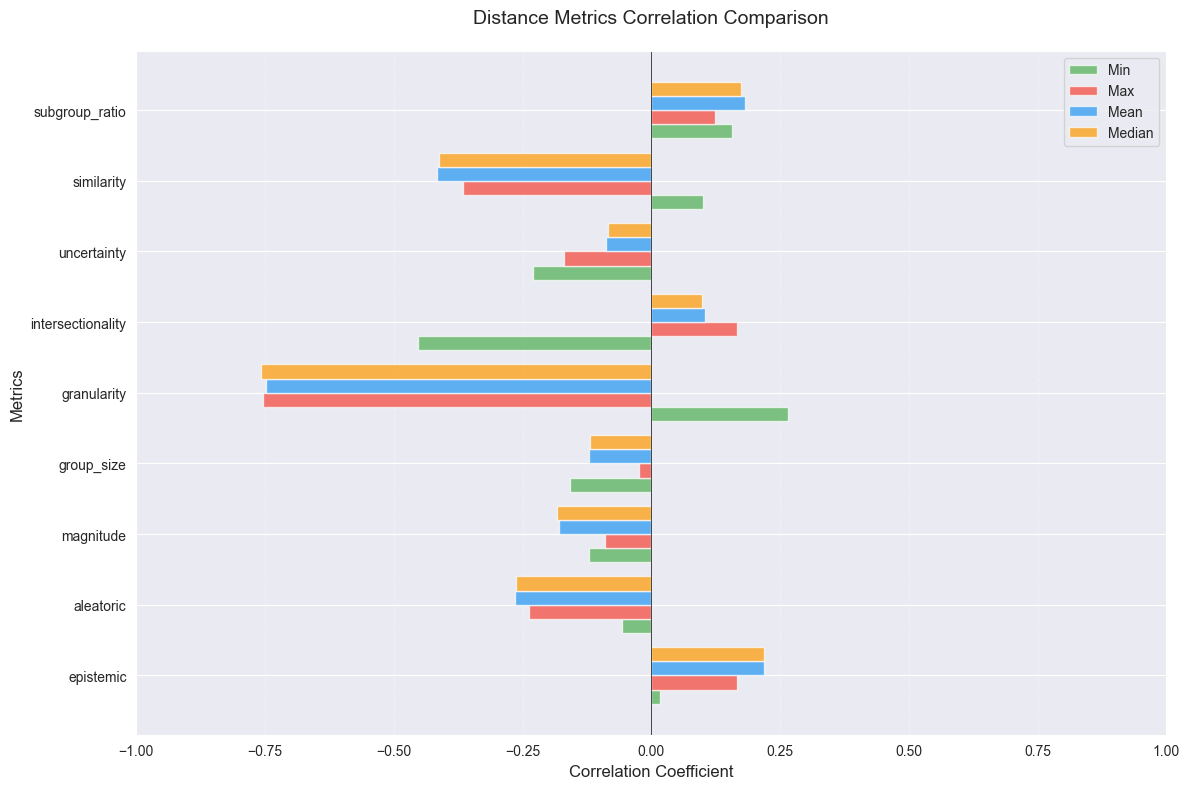

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_plot_correlations(df):
    """
    Analyze correlations between calculated_ and distance_ columns and create a horizontal bar plot.

    Parameters:
    df (pandas.DataFrame): DataFrame containing columns with 'calculated_' and distance_ prefixes
    """
    # Get column names
    calculated_cols = [col for col in df.columns if col.startswith('calculated_')]
    distance_metrics = ['min_distance', 'max_distance', 'mean_distance', 'median_distance']

    if not calculated_cols:
        raise ValueError("No calculated_ columns found in the DataFrame")

    # Calculate correlations
    correlations = []
    for metric in calculated_cols:
        row = []
        for dist_type in distance_metrics:
            if dist_type in df.columns:
                x = df[metric].to_numpy()
                y = df[dist_type].to_numpy()
                mask = ~(np.isnan(x) | np.isnan(y))
                x = x[mask]
                y = y[mask]
                correlation = np.corrcoef(x, y)[0, 1] if len(x) > 0 and len(y) > 0 else np.nan
            else:
                correlation = np.nan
            row.append(correlation)
        correlations.append(row)

    # Create correlation DataFrame
    corr_df = pd.DataFrame(correlations,
                          index=[col.replace('calculated_', '') for col in calculated_cols],
                          columns=distance_metrics)

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Create horizontal bars
    y_pos = np.arange(len(corr_df.index))
    width = 0.2  # Reduced width to accommodate 4 bars

    # Define colors for different distance metrics
    colors = {
        'min_distance': '#4CAF50',    # Green
        'max_distance': '#F44336',    # Red
        'mean_distance': '#2196F3',   # Blue
        'median_distance': '#FF9800'  # Orange
    }

    # Plot bars for each distance metric
    for i, (metric, color) in enumerate(colors.items()):
        offset = (i - 1.5) * width  # Center the group of bars
        plt.barh(y_pos + offset, corr_df[metric], width,
                label=metric.replace('_distance', '').capitalize(),
                color=color,
                alpha=0.7)

    # Customize the plot
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Metrics', fontsize=12)
    plt.title('Distance Metrics Correlation Comparison', fontsize=14, pad=20)
    plt.yticks(y_pos, corr_df.index, fontsize=10)

    # Add gridlines
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)

    # Add legend
    plt.legend()

    # Set x-axis limits to [-1, 1] for correlation coefficient range
    plt.xlim(-1, 1)

    # Adjust layout
    plt.tight_layout()

    return corr_df

correlation_results = analyze_and_plot_correlations(correlation_results_df)
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def analyze_treatment_impacts(df, target='mean_distance', treatment_prefix='calculated_'):
    """
    Analyze the impact of treatment variables on a target variable.

    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe containing treatment and outcome variables
    target : str
        Name of the target variable
    treatment_prefix : str
        Prefix for treatment variables
    """
    # Identify treatment columns
    treatment_cols = [col for col in df.columns if col.startswith(treatment_prefix)]

    # Prepare data
    X = df[treatment_cols]
    y = df[target]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=treatment_cols)

    # Fit models
    # 1. Regular Linear Regression
    lr = LinearRegression()
    lr.fit(X_scaled, y)

    # 2. Lasso for feature selection
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X_scaled, y)

    # Calculate various metrics and impacts
    results = {
        'linear_regression': {
            'coefficients': dict(zip(treatment_cols, lr.coef_)),
            'r2_score': lr.score(X_scaled, y),
            'cross_val_scores': cross_val_score(lr, X_scaled, y, cv=5).mean()
        },
        'correlations': {},
        'feature_importance': {},
        'statistical_tests': {}
    }

    # Calculate correlations
    for col in treatment_cols:
        correlation, p_value = stats.pearsonr(df[col], y)
        results['correlations'][col] = {
            'correlation': correlation,
            'p_value': p_value
        }

    # Calculate feature importance using absolute standardized coefficients
    feature_importance = pd.DataFrame({
        'feature': treatment_cols,
        'importance': np.abs(lr.coef_),
        'coefficient': lr.coef_
    }).sort_values('importance', ascending=False)

    results['feature_importance'] = feature_importance.to_dict('records')

    # Generate plots
    plt.figure(figsize=(15, 10))

    # 1. Coefficient plot
    plt.subplot(2, 1, 1)
    sns.barplot(data=feature_importance, x='feature', y='coefficient')
    plt.xticks(rotation=45)
    plt.title('Treatment Variable Coefficients')

    # 2. Correlation heatmap
    plt.subplot(2, 1, 2)
    correlation_matrix = X_scaled.copy()
    correlation_matrix[target] = y
    sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')

    plt.tight_layout()

    # Summary statistics
    summary = {
        'strongest_impact': feature_importance.iloc[0]['feature'],
        'strongest_impact_magnitude': feature_importance.iloc[0]['importance'],
        'model_r2': results['linear_regression']['r2_score'],
        'cv_score': results['linear_regression']['cross_val_scores']
    }

    return results, summary


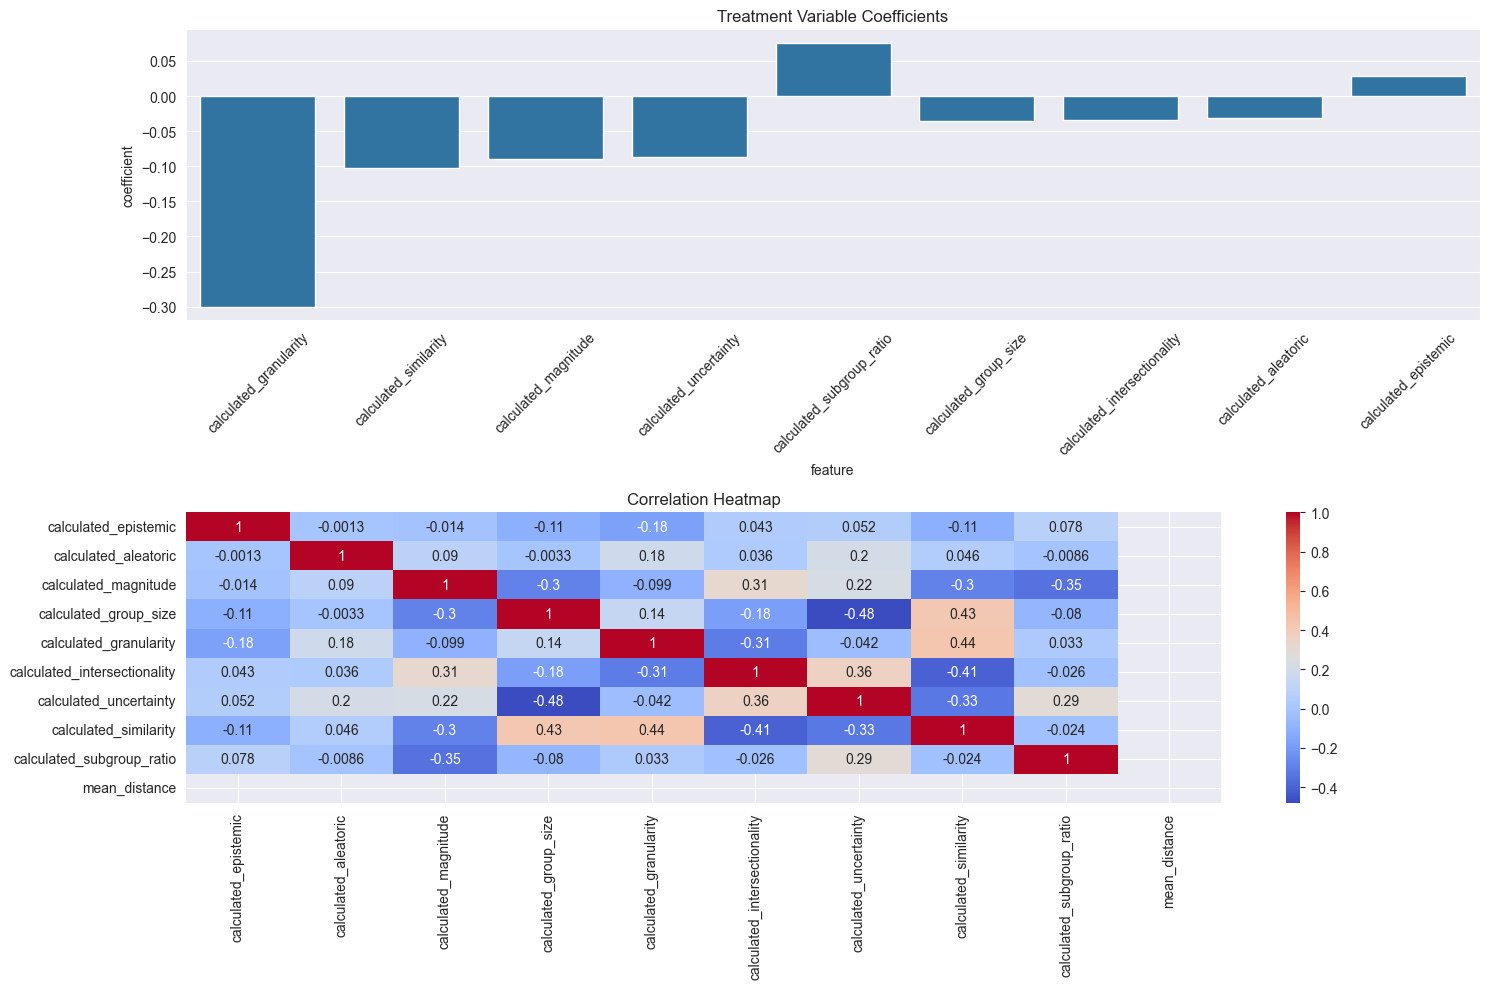

In [30]:
results, summary = analyze_treatment_impacts(correlation_results_df, target='mean_distance', treatment_prefix='calculated_')
